<a href="https://colab.research.google.com/github/Tyler9937/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Copy_of_LS_DS_431_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### **Input Layer:** Where the data that is being trained is entered. There can be as manny of these input nodes as needed
### **Hidden Layer:** A layer of at least
### **Output Layer:** Where Our results go, the predictions of the model.
### **Neuron: Basically** a function where all the inputs are passed through multiplied by their weights, added to by a bias and then passed through a activation function such as the sigmoid function
### **Weight:** A wheight is a adjustment that is modified through each epoch to achevie a accurate model. Each weight is multiplied by an input. the weights represent the value or importance of a given input in order to achive a pre defined result.
### **Activation Function:** A function that normalizes the data into probabilites. Is the aspect of a neral network that is most similar to biolagy 
### **Node Map:** Is a visual diagram that maps out the architecture of a neral network. It consist of a variety of nodes such as input, hidden, output nodes.
### **Perceptron:** Is the simplest of neral network models and consits of an input layer and an output layer.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'x3': [1,1,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [0]:
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [0]:
inputs = df.iloc[0:4,0:3]
inputs = np.array(inputs)
#correct_outputs = np.array(df['y'])
weights = 2 * np.random.random((3,1)) - 1

correct_outputs = [[1], [1], [1], [0]]

for i in range(1000):

  weighted_sum = np.dot(inputs, weights)

  activated_output = sigmoid(weighted_sum)

  error = correct_outputs - activated_output

  adjustments = error * sigmoid_derivative(activated_output)

  weights += np.dot(inputs.T, adjustments)

print('weights after training \n', weights)
print('outputs after training \n', activated_output)



weights after training 
 [[-7.20510141]
 [-7.20510119]
 [10.86342607]]
outputs after training 
 [[0.9999808 ]
 [0.97484764]
 [0.97484765]
 [0.02803773]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [5]:
import pandas as pd

diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
import numpy as np

class Perceptron:

  def __init__(self, learning_rate=.05, n_iters=100):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = self._unit_step_func
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # Init weights
    self.weights = np.zeros(n_features)
    self.bias = 0

    y_ = np.array([1 if i > 0 else 0 for i in y])

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)

        update = self.lr * (y_[idx] - y_predicted)
        self.weights += update * x_i
        self.bias += update

  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    y_predicted = self.activation_func(linear_output)
    return y_predicted

  def _unit_step_func(self, x):
    return np.where(x >= 0, 1, 0)

In [0]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]
outcome = list(diabetes)[8]

X = diabetes[feats]
y = diabetes[outcome]

transformer = Normalizer().fit(X)
X = transformer.transform(X)
y = np.array(y)
X = np.array(X)

Perceptron classification accuracy 0.7662337662337663


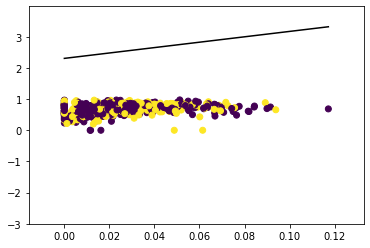

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

p = Perceptron(learning_rate=0.01, n_iters=100)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3, ymax+3])

plt.show()

In [10]:
import matplotlib.pyplot as plt
p = Perceptron(n_iters=10000)
p.fit(X, y)
p.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [0]:
X_test

array([[  6.   ,  98.   ,  58.   , ...,  34.   ,   0.43 ,  43.   ],
       [  2.   , 112.   ,  75.   , ...,  35.7  ,   0.148,  21.   ],
       [  2.   , 108.   ,  64.   , ...,  30.8  ,   0.158,  21.   ],
       ...,
       [  8.   ,  95.   ,  72.   , ...,  36.8  ,   0.485,  57.   ],
       [  2.   , 146.   ,  70.   , ...,  28.   ,   0.337,  29.   ],
       [  8.   ,  74.   ,  70.   , ...,  35.3  ,   0.705,  39.   ]])

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?